# The Influence of PM2.5 Air Pollution on Asthma Rates in California Adults

### by Kate Feng, Katelyn Abille, Heidi Tam, Kyla Park, Felix Najera

### Demo Video: https://youtu.be/Oz4j4woGs2w

# Abstract

Air pollutants such as particulate matter 2.5 (PM2.5) are a significant public health concern, worsened over time by the effects of climate change. The growing number of individuals impacted by poor air quality presents an alarming trend, highlighting the need to examine how industrial pollutants impact public health. Thus, our study investigates the correlation between PM2.5 pollution levels and the prevalence of adult asthma in California, aiming to identify regional patterns and explore potential confounding factors. Understanding these relationships is critical to developing effective policies for mitigating pollutants and asthma prevalence in affected regions.

To analyze this in our research, we integrated data from the Centers for Disease Control and Prevention's PLACES dataset on disease prevalence and the Environmental Protection Agency's PM2.5 pollution data. After preprocessing and aggregating the data at the county level, we conducted exploratory data analysis to assess spatial, temporal, and distributional trends of PM2.5 and asthmatic adults. Statistical and visual analyses were used to identify potential correlations and patterns between pollution levels and asthma rates.

Our findings reveal significant regional disparities in PM2.5 levels, with Central California having the highest average concentrations that exceed health advisory thresholds. While asthma prevalence also showed overlap with some high PM2.5 counties in Central California, Northern California exhibited higher asthma rates despite relatively lower PM2.5 levels. These findings suggest the influence of regional confounding factors such as urbanization and healthcare access. Southern California demonstrated the lowest asthma prevalence and PM2.5 levels, aligning with expectations.
    
While there is some evidence of a correlation between PM2.5 pollution and asthma prevalence, our findings conclude that we cannot determine a direct, causal relationship. The relationship is complex, and influenced by additional factors beyond pollution alone. Nonetheless, these findings highlight the need for multifaceted approaches to addressing asthma prevalence, including pollution reduction and targeted healthcare interventions in vulnerable regions.

</div>

# Research Question

How do the prevalence and proximity to PM2.5 pollution correlate with the incidences of asthma in adults in California? 

## Background and Prior Work

The American Lung Association conducts annual “State of the Air” reports and recently revealed that 40% of Americans live in regions with unhealthy air pollution levels. This indicates a decline in progress toward clean air, which is assumed to have been exacerbated by the effects of climate change. Since 2020, the number of affected individuals has surged by nearly 12 million, rising from 131 million. This alarming trend underscores the need to examine how industrial pollutants impact public health, particularly regarding respiratory diseases such as asthma. As air quality continues to deteriorate in many urban centers, it is essential to investigate the correlation between pollution exposure and the incidence of these health issues, especially among the most vulnerable populations in densely populated areas of the United States.

In 1993, scientists were interested in the association between air pollution and daily mortality rates and decided to conduct a population-based, cross-sectional survey investigating cities in the United States. They controlled for individual risk factors in their data collection and conducted a survival analysis with Cox proportional-hazard regression modeling. They studied 8,111 adults in 6 U.S. cities and followed up on them fourteen to sixteen years later. Unsurprisingly, the results demonstrated that mortality was strongly associated with cigarette smoking. On average, the mortality rate of the most polluted cities in the U.S. was 1.26 times greater than the mortality rate of the least polluted cities. There was a strong positive correlation between air pollution with lung cancer and pulmonary disease.<a href="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) This relates to our project because we are interested in seeing if there is a relationship between the prevalence of respiratory disease with air pollutants. 

Another study conducted was in Italy starting in 2000. The most populated cities of Italy were included in this study, with the exception of Naples. The researchers ran their analyses on the risks of hospital admissions and mortality rates by cities using Bayesian modeling. The researchers involved found positive associations between death and hospital admissions for both cardiovascular and respiratory diseases. They also found trends in mortality when ozone was present in the warm seasons.  The scientists found the effect of pollutants and risks of mortality were statistically more significant during the warm season and could have many challenges associated with it. For example, hospitals may have less bedding available during the warm season. <a href="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) This relates to our project because we are interested in how external factors may influence the prevalence of respiratory diseases. 


 **Citations** 


1. <a name="cite_note-1"></a> [^](#cite_ref-1) Dockery, D. W., Pope, C. A., 3rd, Xu, X., Spengler, J. D., Ware, J. H., Fay, M. E., Ferris, B. G., Jr, & Speizer, F. E. (1993). An association between air pollution and mortality in six U.S. cities. The New England journal of medicine, 329(24), 1753–1759. https://doi.org/10.1056/NEJM199312093292401
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Biggeri, A., Bellini, P., Terracini, B., & Italian MISA Group (2001). Metanalisi italiana degli studi sugli effetti a breve termine dell'inquinamento atmosferico [Meta-analysis of the Italian studies on short-term effects of air pollution]. Epidemiologia e prevenzione, 25(2 Suppl), 1–71. https://pubmed.ncbi.nlm.nih.gov/11515188/
3. <a name="cite_note-3"></a> [^](#cite_ref-3) Borunda, A. (2024, April 24). 130 million Americans breathe unhealthy air, State of the Air report finds. NPR. https://www.npr.org/2024/04/24/1246729103/unhealthy-dangerous-air-hurts-130-million-americans


# Hypothesis


There will be a strong positive correlation between the prevalence and proximity to PM2.5 pollution and the incidence of asthma in adults, in the state of California. Areas of California containing high levels of PM2.5 are expected to exhibit higher rates of asthma in adults due to increased exposure to fine particles in the air.

# Data

## Setup

Before loading in and cleaning our data, it is important that we establish our needed libraries, packages, and other tools:

In [2]:
# to load in data as a DataFrame
import pandas as pd 

# to collect PLACES data from API Endpoint
import io 
import requests

pd.set_option('display.max_columns', None)

## Data overview

**PLACES: Local Data for Better Health, County Data**

https://data.cdc.gov/500-Cities-Places/PLACES-Local-Data-for-Better-Health-County-Data-20/swc5-untb/about_data
  
For the raw data, we have:
  
- Number of observations: 240886  
- Number of variables: 22

For the cleaned data, we have:
- Number of observations: 58
- Number of variabes: 9

  
    The raw PLACES dataset provides localized health data at the county level across the United States, including incidences of various health conditions. For each county, key variables include `'totalpopulation'`, which represents the county population count, and `'data_value'`, a percentage indicating the prevalence of specific health conditions such as arthritis or asthma within the adult population. (Note that `'data_value_unit'` is solely "%", meaning that all of `'data_value'` is a percentage of the population.)
    
    For preprocessing, the dataset will need filtering to select the 58 California counties and the specific health measure for asthma ("CASTHMA"). Additionally, we can later ensure that the data is standardized by population (if not already done) to support accurate comparisons when correlating asthma rates with pollution levels. In order to safely query the data from the CDC PLACES API, we will first make a function that retrieves the data in chunks and concatenates it all together. From there, we will query for data only from California, check if all counties are equally represented, and drop redundant columns. Since crude prevalence and adult prevalence are in separate rows for each county, we will also separate the information for each county and combine all the information into a new DataFrame (see below).


**EPA: 2022 PM2.5 Levels in California**

https://www.epa.gov/outdoor-air-quality-data/download-daily-data

For the raw data, we have:
  - Number of observations: 59756
  - Number of variables: 22

For the cleaned data, we have:
  - Number of observations: 59756
  - Number of variables: 12

    The raw EPA AirData provides detailed information on air quality in California, focusing on particulate matter (PM2.5) levels collected from outdoor monitoring sites in the Air Quality System (AQS). For each date and monitoring site, the data includes two key metrics: the `Daily Mean 'PM2.5 Concentration'` and the `'Daily AQI Value'`. The `Daily Mean 'PM2.5 Concentration'` represents the average concentration of PM2.5 particles at a given site on a particular day.  The `'Daily AQI Value'`, on the other hand, translates these concentrations into an Air Quality Index (AQI) score, which makes it easier to understand the health implications. According to this scale, an AQI above 150 is considered unhealthy for the general population, while values over 101 pose potential health risks for sensitive groups.

    We will start by loading the dataset from a CSV retrieved from the EPA-filtered data. Since the data is already filtered to California data, we can start by dropping the unnecessary columns. From there, we can check for columns containing null values and replace them with an “UNKNOWN” string. From there, we need to aggregate it by county since there are various sites within each county and across all days in 2022. For a greater overview, we can get the values necessary, the PM2.5 levels and AQI values, and then group by the `'County'` column, using the mean aggregate method. For now, however, we will not aggregate yet so we can perform time series analysis in the EDA portion.


**COMBINING THE DATA**<br>
To combine the data, we can get an overview average merged dataset by using group by for the EPA AirData and aggregating using mean. This will get both datasets to contain one row per county, and we can merge by the `'locationname'` column and the `'County'` column. Since there are more counties listed in the PLACES dataset, we will figure out a way during the EDA checkpoint to group nearby counties together in the EPA dataset to allow the extra 8 counties in PLACES to still be used. We can also look at the data per county per day (or per month) in a time series analysis in combination with the PLACES data, which we will explore more in the EDA checkpoint.

## [PLACES: Local Data for Better Health, County Data](https://data.cdc.gov/500-Cities-Places/PLACES-Local-Data-for-Better-Health-County-Data-20/swc5-untb/about_data)

Recall that there are **240886 observations** and **22 columns/variables** in the raw data.
<br><br>
To load in the following data, we will be querying from the [API Endpoint](https://data.cdc.gov/resource/swc5-untb.json).

In [3]:
def places_api(places_url):
    '''
    Function to automate loading in data from PLACES API

    params
    ------
    places_url: URL to PLACES data from API Endpoint.
                Can ONLY be PLACES datasets, as not all APIs support
                the same url params.
    '''
    all_data = [] 
    chunk_size = 50000 # load in 50000 rows at a time to be safe
    offset = 0
    
    while True:
        params = {
            "$limit": chunk_size,
            "$offset": offset
        }
        
        response = requests.get(places_url, params=params)
        if response.status_code != 200:
            print(f"Error {response.status_code}: {response.text}")
            break
        
        data_chunk = pd.read_csv(io.StringIO(response.text))
        
        if data_chunk.empty: # if no more data to load
            break
        
        all_data.append(data_chunk)
    
        print(f"| PROGRESS: rows {offset} to {offset+chunk_size} loaded!")
        
        offset += chunk_size
    
    places = pd.concat(all_data, ignore_index=True)
    return places

Now that we have our function ready, let's load in our dataset!

In [4]:
places = places_api("https://data.cdc.gov/resource/swc5-untb.csv")
places.head()

/var/folders/3j/drj0214n2bqdbrn4vd1d19_m0000gn/T/ipykernel_63819/2583507890.py:26: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data_chunk = pd.read_csv(io.StringIO(response.text))


| PROGRESS: rows 0 to 50000 loaded!
| PROGRESS: rows 50000 to 100000 loaded!
| PROGRESS: rows 100000 to 150000 loaded!
| PROGRESS: rows 150000 to 200000 loaded!
| PROGRESS: rows 200000 to 250000 loaded!


year stateabbr statedesc locationname datasource         category  \
0  2022        AL   Alabama         Clay      BRFSS  Health Outcomes   
1  2022        AL   Alabama         Dale      BRFSS  Health Outcomes   
2  2022        AL   Alabama      Jackson      BRFSS  Health Outcomes   
3  2022        AL   Alabama   Lauderdale      BRFSS  Health Outcomes   
4  2022        AL   Alabama     Lawrence      BRFSS       Disability   

                       measure data_value_unit          data_value_type  \
0  Current asthma among adults               %         Crude prevalence   
1       Arthritis among adults               %         Crude prevalence   
2          Stroke among adults               %         Crude prevalence   
3         Obesity among adults               %  Age-adjusted prevalence   
4  Any disability among adults               %         Crude prevalence   

   data_value data_value_footnote_symbol data_value_footnote  \
0        11.0                        NaN                 NaN   
1        35.6                        NaN                 NaN   
2         5.1                        NaN                 NaN   
3        36.5                        NaN                 NaN   
4        40.1                        NaN                 NaN   

   low_confidence_limit  high_confidence_limit  totalpopulation  \
0                   9.6                   12.4            14198   
1                  34.8                   36.4            49544   
2                   4.6                    5.6            52891   
3                  29.6                   43.9            95878   
4                  35.5                   44.7            33214   

   totalpop18plus  locationid categoryid   measureid datavaluetypeid  \
0           11235        1027    HLTHOUT     CASTHMA          CrdPrv   
1           38039        1045    HLTHOUT   ARTHRITIS          CrdPrv   
2           42087        1071    HLTHOUT      STROKE          CrdPrv   
3           77472        1077    HLTHOUT     OBESITY       AgeAdjPrv   
4           26022        1079    DISABLT  DISABILITY          CrdPrv   

  short_question_text                                 geolocation  
0      Current Asthma  POINT (-85.8606604130173 33.2693085517833)  
1           Arthritis  POINT (-85.6109266826185 31.4316629601359)  
2              Stroke  POINT (-85.9995052603961 34.7796392771775)  
3             Obesity  POINT (-87.6540983850983 34.9014438477101)  
4      Any Disability  POINT (-87.3108851040374 34.5216735395968)

***Regarding the raw dataset:***

Overall, the raw PLACES county data contains crucial columns/variables that require more processing, particularly the `data_value`, `high_`, and `low_confidence` columns which are separated by crude and age-adjusted prevalence. All other columns in the original dataset exhibit normal "metrics," but further investigation in our cleaning and EDA may be necessary to determine whether all the information needed to arrive at our findings with our chosen models is available. Our raw PLACES data also appears to provide intermediate columns for different use cases for the dataset. The `"datavaluetypeid"` specifically would be the case providing ID values for `"data_value_type"`", and therefore, it may be redundant for our use case. We shall later address this in dropped columns.

There's also a peculiarity where values had very specific footnote labels with "The estimates are based on 39 states and DC." These results are found within `places[places["locationname"] == "NaN"]`, therefore whether this has a large impact on our modeling is redundant since it is being excluded (not California).

Regarding the raw data types, the majority of the variables are of the String data type, with the numerical values contained in the data_values for asthma and other health issues in the dataset. The corresponding confidence intervals and the other numerical values to measure, such as `totalpopulation` and `totalpop18plus`, are also numerical.

In [5]:
places.shape

(240886, 22)

In [6]:
places.columns

Index(['year', 'stateabbr', 'statedesc', 'locationname', 'datasource',
       'category', 'measure', 'data_value_unit', 'data_value_type',
       'data_value', 'data_value_footnote_symbol', 'data_value_footnote',
       'low_confidence_limit', 'high_confidence_limit', 'totalpopulation',
       'totalpop18plus', 'locationid', 'categoryid', 'measureid',
       'datavaluetypeid', 'short_question_text', 'geolocation'],
      dtype='object')

Some important details to note in regards to our focus, California:

In [7]:
# all CA counties have 80 observations!
places[places['stateabbr'] == 'CA']['locationname'].value_counts().unique() 

array([80])

In [8]:
places_counties = set(places[places['stateabbr'] == 'CA']['locationname'].unique())

ca_counties = set(
    ["Alameda", "Alpine", "Amador", "Butte", "Calaveras", "Colusa", "Contra Costa", 
    "Del Norte", "El Dorado", "Fresno", "Glenn", "Humboldt", "Imperial", "Inyo", 
    "Kern", "Kings", "Lake", "Lassen", "Los Angeles", "Madera", "Marin", "Mariposa", 
    "Mendocino", "Merced", "Modoc", "Mono", "Monterey", "Napa", "Nevada", "Orange", 
    "Placer", "Plumas", "Riverside", "Sacramento", "San Benito", "San Bernardino", 
    "San Diego", "San Francisco", "San Joaquin", "San Luis Obispo", "San Mateo", 
    "Santa Barbara", "Santa Clara", "Santa Cruz", "Shasta", "Sierra", "Siskiyou", 
    "Solano", "Sonoma", "Stanislaus", "Sutter", "Tehama", "Trinity", "Tulare", 
    "Tuolumne", "Ventura", "Yolo", "Yuba"]
) # acquired from the link below to verify wholeness of data

In [9]:
places_counties == ca_counties

True

Above, we see that all [58 counties in California](https://ballotpedia.org/Counties_in_California) are equally represented in the data!

### Cleaning the Data

To narrow down our scope to data on asthma in California, let's perform a couple of filters first:

In [10]:
ca_places = places[(places['stateabbr'] == 'CA') & (places['measureid'] == 'CASTHMA')]
ca_places.head()

year stateabbr   statedesc   locationname datasource         category  \
38   2022        CA  California           Lake      BRFSS  Health Outcomes   
46   2022        CA  California           Yuba      BRFSS  Health Outcomes   
83   2022        CA  California    Los Angeles      BRFSS  Health Outcomes   
689  2022        CA  California    San Joaquin      BRFSS  Health Outcomes   
793  2022        CA  California  San Francisco      BRFSS  Health Outcomes   

                         measure data_value_unit          data_value_type  \
38   Current asthma among adults               %         Crude prevalence   
46   Current asthma among adults               %         Crude prevalence   
83   Current asthma among adults               %         Crude prevalence   
689  Current asthma among adults               %  Age-adjusted prevalence   
793  Current asthma among adults               %         Crude prevalence   

     data_value data_value_footnote_symbol data_value_footnote  \
38         10.8                        NaN                 NaN   
46         11.1                        NaN                 NaN   
83          9.1                        NaN                 NaN   
689        10.1                        NaN                 NaN   
793         8.5                        NaN                 NaN   

     low_confidence_limit  high_confidence_limit  totalpopulation  \
38                    9.6                   12.2            68191   
46                    9.8                   12.5            84310   
83                    8.2                   10.1          9721138   
689                   8.9                   11.3           793229   
793                   7.5                    9.6           808437   

     totalpop18plus  locationid categoryid measureid datavaluetypeid  \
38            53338        6033    HLTHOUT   CASTHMA          CrdPrv   
46            61597        6115    HLTHOUT   CASTHMA          CrdPrv   
83          7737357        6037    HLTHOUT   CASTHMA          CrdPrv   
689          586031        6077    HLTHOUT   CASTHMA       AgeAdjPrv   
793          697737        6075    HLTHOUT   CASTHMA          CrdPrv   

    short_question_text                                 geolocation  
38       Current Asthma  POINT (-122.753413599125 39.0999886976907)  
46       Current Asthma   POINT (-121.35117318039 39.2689845062383)  
83       Current Asthma   POINT (-118.224550062411 34.321384729882)  
689      Current Asthma  POINT (-121.271085290011 37.9345365020323)  
793      Current Asthma  POINT (-122.439681175401 37.7566838021847)

In [11]:
ca_places["measure"].unique()

array(['Current asthma among adults'], dtype=object)

Notice how there are currently 116 rows, 2 for each county. This is because "Crude prevalence" and "Age-adjusted prevalence" are separated into two columns per county, which is extremely important to note since we are focused on 'Current asthma among **adults**':

In [12]:
ca_places.sort_values(by="locationname").head(6)

year stateabbr   statedesc locationname datasource         category  \
3345   2022        CA  California      Alameda      BRFSS  Health Outcomes   
8829   2022        CA  California      Alameda      BRFSS  Health Outcomes   
15082  2022        CA  California       Alpine      BRFSS  Health Outcomes   
10276  2022        CA  California       Alpine      BRFSS  Health Outcomes   
5052   2022        CA  California       Amador      BRFSS  Health Outcomes   
7488   2022        CA  California       Amador      BRFSS  Health Outcomes   

                           measure data_value_unit          data_value_type  \
3345   Current asthma among adults               %         Crude prevalence   
8829   Current asthma among adults               %  Age-adjusted prevalence   
15082  Current asthma among adults               %  Age-adjusted prevalence   
10276  Current asthma among adults               %         Crude prevalence   
5052   Current asthma among adults               %         Crude prevalence   
7488   Current asthma among adults               %  Age-adjusted prevalence   

       data_value data_value_footnote_symbol data_value_footnote  \
3345          8.9                        NaN                 NaN   
8829          8.9                        NaN                 NaN   
15082        10.5                        NaN                 NaN   
10276        10.3                        NaN                 NaN   
5052         10.5                        NaN                 NaN   
7488         10.5                        NaN                 NaN   

       low_confidence_limit  high_confidence_limit  totalpopulation  \
3345                    7.9                   10.0          1628997   
8829                    7.9                   10.1          1628997   
15082                   9.3                   11.9             1190   
10276                   9.1                   11.7             1190   
5052                    9.2                   11.8            41412   
7488                    9.2                   11.8            41412   

       totalpop18plus  locationid categoryid measureid datavaluetypeid  \
3345          1311253        6001    HLTHOUT   CASTHMA          CrdPrv   
8829          1311253        6001    HLTHOUT   CASTHMA       AgeAdjPrv   
15082             998        6003    HLTHOUT   CASTHMA       AgeAdjPrv   
10276             998        6003    HLTHOUT   CASTHMA          CrdPrv   
5052            35068        6005    HLTHOUT   CASTHMA          CrdPrv   
7488            35068        6005    HLTHOUT   CASTHMA       AgeAdjPrv   

      short_question_text                                 geolocation  
3345       Current Asthma  POINT (-121.888566503138 37.6463311425304)  
8829       Current Asthma  POINT (-121.888566503138 37.6463311425304)  
15082      Current Asthma  POINT (-119.820667930537 38.5974751291386)  
10276      Current Asthma  POINT (-119.820667930537 38.5974751291386)  
5052       Current Asthma  POINT (-120.650760892534 38.4464297028895)  
7488       Current Asthma  POINT (-120.650760892534 38.4464297028895)

In [13]:
ca_places.nunique()

year                           1
stateabbr                      1
statedesc                      1
locationname                  58
datasource                     1
category                       1
measure                        1
data_value_unit                1
data_value_type                2
data_value                    27
data_value_footnote_symbol     0
data_value_footnote            0
low_confidence_limit          24
high_confidence_limit         29
totalpopulation               58
totalpop18plus                58
locationid                    58
categoryid                     1
measureid                      1
datavaluetypeid                2
short_question_text            1
geolocation                   58
dtype: int64

Notice that a lot of information also *repeats*, ie. `'stateabbr'` and `'statedesc'`. Additionally, some columns only have *one* value or even *zero* values (i.e. `'year'` is always 2022 and `'datasource'` is always BRFSS). We can drop some of these redundant columns:

In [14]:
ca_places = ca_places.drop(columns=[
                "year", "stateabbr", "statedesc", "datasource",
                "geolocation", "locationid", "category", "categoryid",
                "measure", "measureid", "short_question_text",
                "data_value_unit", "data_value_footnote_symbol", "data_value_footnote",
                ]
            )

**Dropped Columns**

To recap, here's the reasoning behind all our dropped columns:

* `"year"`, `"stateabbr"`, `"statedesc"`, `"datasource"`: This information is all the same throughout our subset of data; all of our data is from 2022 California and sourced from BRFSS.
* `"geolocation"`, `'locationid'`: This corresponds to county, which we will find in `'locationname'` (to help with joining later!)
* `"category"`, `"categoryid"`, `"measure"`, `"measureid"`, `"short_question_text"`: All data pertains to "Health Outcomes" on adults who currently have asthma (as of 2022).
* `"data_value_unit"`: All values are in percentages of the population.
* `"data_value_footnote_symbol"`, `"data_value_footnote"`: In our susbset of data, these are all NaNs.

In [15]:
ca_places.sort_values(by="locationname").head(10)

locationname          data_value_type  data_value  low_confidence_limit  \
3345       Alameda         Crude prevalence         8.9                   7.9   
8829       Alameda  Age-adjusted prevalence         8.9                   7.9   
15082       Alpine  Age-adjusted prevalence        10.5                   9.3   
10276       Alpine         Crude prevalence        10.3                   9.1   
5052        Amador         Crude prevalence        10.5                   9.2   
7488        Amador  Age-adjusted prevalence        10.5                   9.2   
10620        Butte  Age-adjusted prevalence        10.7                   9.4   
14634        Butte         Crude prevalence        10.7                   9.4   
10943    Calaveras         Crude prevalence        10.6                   9.4   
5667     Calaveras  Age-adjusted prevalence        10.8                   9.5   

       high_confidence_limit  totalpopulation  totalpop18plus datavaluetypeid  
3345                    10.0          1628997         1311253          CrdPrv  
8829                    10.1          1628997         1311253       AgeAdjPrv  
15082                   11.9             1190             998       AgeAdjPrv  
10276                   11.7             1190             998          CrdPrv  
5052                    11.8            41412           35068          CrdPrv  
7488                    11.8            41412           35068       AgeAdjPrv  
10620                   12.1           207303          165784       AgeAdjPrv  
14634                   12.1           207303          165784          CrdPrv  
10943                   11.9            46563           38508          CrdPrv  
5667                    12.2            46563           38508       AgeAdjPrv

Now our final step: ensuring that each county represents one row/observation in our data! This means, for crude and age-adjusted prevalence, we need to depict `"data_value"`, `"low_confidence_limit"`, and `"high_confidence_limit"` in in one observation!

To do so, each observation will have the new columns `"crude_data_value"`, `"crude_low_confidence_limit"`, and `"crude_high_confidence_limit"` for crude prevalence, and `"age_data_value"`, `"age_low_confidence_limit"`, and `"age_high_confidence_limit"` for age-adjusted.

In [16]:
prevalence_pivot = ca_places.pivot(
    index='locationname', 
    columns='data_value_type', 
    values=['data_value', 'low_confidence_limit', 'high_confidence_limit']
)
prevalence_pivot.head()

data_value                   \
data_value_type Age-adjusted prevalence Crude prevalence   
locationname                                               
Alameda                             8.9              8.9   
Alpine                             10.5             10.3   
Amador                             10.5             10.5   
Butte                              10.7             10.7   
Calaveras                          10.8             10.6   

                   low_confidence_limit                   \
data_value_type Age-adjusted prevalence Crude prevalence   
locationname                                               
Alameda                             7.9              7.9   
Alpine                              9.3              9.1   
Amador                              9.2              9.2   
Butte                               9.4              9.4   
Calaveras                           9.5              9.4   

                  high_confidence_limit                   
data_value_type Age-adjusted prevalence Crude prevalence  
locationname                                              
Alameda                            10.1             10.0  
Alpine                             11.9             11.7  
Amador                             11.8             11.8  
Butte                              12.1             12.1  
Calaveras                          12.2             11.9

In [17]:
prevalence_pivot.columns

MultiIndex([(           'data_value', 'Age-adjusted prevalence'),
            (           'data_value',        'Crude prevalence'),
            ( 'low_confidence_limit', 'Age-adjusted prevalence'),
            ( 'low_confidence_limit',        'Crude prevalence'),
            ('high_confidence_limit', 'Age-adjusted prevalence'),
            ('high_confidence_limit',        'Crude prevalence')],
           names=[None, 'data_value_type'])

In [18]:
prevalence_pivot.columns = [
    f"{'age' if 'Age' in val_type else 'crude'}_{metric}" for metric, val_type in prevalence_pivot.columns
]

prevalence_pivot = prevalence_pivot.reset_index()
prevalence_pivot.head()

locationname  age_data_value  crude_data_value  age_low_confidence_limit  \
0      Alameda             8.9               8.9                       7.9   
1       Alpine            10.5              10.3                       9.3   
2       Amador            10.5              10.5                       9.2   
3        Butte            10.7              10.7                       9.4   
4    Calaveras            10.8              10.6                       9.5   

   crude_low_confidence_limit  age_high_confidence_limit  \
0                         7.9                       10.1   
1                         9.1                       11.9   
2                         9.2                       11.8   
3                         9.4                       12.1   
4                         9.4                       12.2   

   crude_high_confidence_limit  
0                         10.0  
1                         11.7  
2                         11.8  
3                         12.1  
4                         11.9

In [19]:
ca_places = ca_places[['locationname', 'totalpopulation', 'totalpop18plus']].drop_duplicates()
ca_places.head()

locationname  totalpopulation  totalpop18plus
38            Lake            68191           53338
46            Yuba            84310           61597
83     Los Angeles          9721138         7737357
689    San Joaquin           793229          586031
793  San Francisco           808437          697737

In [20]:
ca_places = pd.merge(prevalence_pivot, ca_places, on='locationname')
ca_places.head()

locationname  age_data_value  crude_data_value  age_low_confidence_limit  \
0      Alameda             8.9               8.9                       7.9   
1       Alpine            10.5              10.3                       9.3   
2       Amador            10.5              10.5                       9.2   
3        Butte            10.7              10.7                       9.4   
4    Calaveras            10.8              10.6                       9.5   

   crude_low_confidence_limit  age_high_confidence_limit  \
0                         7.9                       10.1   
1                         9.1                       11.9   
2                         9.2                       11.8   
3                         9.4                       12.1   
4                         9.4                       12.2   

   crude_high_confidence_limit  totalpopulation  totalpop18plus  
0                         10.0          1628997         1311253  
1                         11.7             1190             998  
2                         11.8            41412           35068  
3                         12.1           207303          165784  
4                         11.9            46563           38508

In [21]:
ca_places.isna().sum()

locationname                   0
age_data_value                 0
crude_data_value               0
age_low_confidence_limit       0
crude_low_confidence_limit     0
age_high_confidence_limit      0
crude_high_confidence_limit    0
totalpopulation                0
totalpop18plus                 0
dtype: int64

#### Data Summary

After cleaning, we luckily have no NaN values to process. The PLACES data is clean and ready for analysis! Now let's explore each variable.

In [22]:
ca_places.columns

Index(['locationname', 'age_data_value', 'crude_data_value',
       'age_low_confidence_limit', 'crude_low_confidence_limit',
       'age_high_confidence_limit', 'crude_high_confidence_limit',
       'totalpopulation', 'totalpop18plus'],
      dtype='object')

In [23]:
ca_places.dtypes

locationname                    object
age_data_value                 float64
crude_data_value               float64
age_low_confidence_limit       float64
crude_low_confidence_limit     float64
age_high_confidence_limit      float64
crude_high_confidence_limit    float64
totalpopulation                  int64
totalpop18plus                   int64
dtype: object

- `locationname`: String object detailing the county—to be joined with `County` in pollutant data.
- `totalpopulation`: Integer, total population of county.
- `totalpop18plus`: Integer, total adult (18+) population of county.
Under "Age-adjusted prevalence":
- `age_data_value`: Float, percent of the population afflicted with current asthma.
- `age_low_confidence_limit`: Float, lower bound of the percentage.
- `age_high_confidence_limit`: Float, upper bound of the percentage.
Under "Crude prevalence":
- `crude_data_value`: Float, percent of the population afflicted with current asthma.
- `crude_low_confidence_limit`: Float, lower bound of the percentage.
- `crude_high_confidence_limit`: Float, upper bound of the percentage.

In [24]:
ca_places.shape

(58, 9)

## [EPA: 2022 PM2.5 Levels in California](https://www.epa.gov/outdoor-air-quality-data/download-daily-data)

We'll start by loading all the data from the csv downloaded from https://www.epa.gov/outdoor-air-quality-data/download-daily-data (filtered on PM2.5, 2022, California)

In [44]:
pollutant_data = pd.read_csv('data/ad_viz_plotval_data.csv')
pollutant_data.head()

Date Source   Site ID  POC  Daily Mean PM2.5 Concentration     Units  \
0  01/01/2022    AQS  60010007    3                            12.7  ug/m3 LC   
1  01/02/2022    AQS  60010007    3                            13.9  ug/m3 LC   
2  01/03/2022    AQS  60010007    3                             7.1  ug/m3 LC   
3  01/04/2022    AQS  60010007    3                             3.7  ug/m3 LC   
4  01/05/2022    AQS  60010007    3                             4.2  ug/m3 LC   

   Daily AQI Value Local Site Name  Daily Obs Count  Percent Complete  \
0               58       Livermore                1             100.0   
1               60       Livermore                1             100.0   
2               39       Livermore                1             100.0   
3               21       Livermore                1             100.0   
4               23       Livermore                1             100.0   

   AQS Parameter Code AQS Parameter Description  Method Code  \
0               88101  PM2.5 - Local Conditions          170   
1               88101  PM2.5 - Local Conditions          170   
2               88101  PM2.5 - Local Conditions          170   
3               88101  PM2.5 - Local Conditions          170   
4               88101  PM2.5 - Local Conditions          170   

                     Method Description  CBSA Code  \
0  Met One BAM-1020 Mass Monitor w/VSCC    41860.0   
1  Met One BAM-1020 Mass Monitor w/VSCC    41860.0   
2  Met One BAM-1020 Mass Monitor w/VSCC    41860.0   
3  Met One BAM-1020 Mass Monitor w/VSCC    41860.0   
4  Met One BAM-1020 Mass Monitor w/VSCC    41860.0   

                           CBSA Name  State FIPS Code       State  \
0  San Francisco-Oakland-Hayward, CA                6  California   
1  San Francisco-Oakland-Hayward, CA                6  California   
2  San Francisco-Oakland-Hayward, CA                6  California   
3  San Francisco-Oakland-Hayward, CA                6  California   
4  San Francisco-Oakland-Hayward, CA                6  California   

   County FIPS Code   County  Site Latitude  Site Longitude  
0                 1  Alameda      37.687526     -121.784217  
1                 1  Alameda      37.687526     -121.784217  
2                 1  Alameda      37.687526     -121.784217  
3                 1  Alameda      37.687526     -121.784217  
4                 1  Alameda      37.687526     -121.784217

In [45]:
pollutant_data.shape

(59756, 22)

In [46]:
pollutant_data.nunique()

Date                              365
Source                              1
Site ID                           167
POC                                12
Daily Mean PM2.5 Concentration    627
Units                               1
Daily AQI Value                   204
Local Site Name                   164
Daily Obs Count                     2
Percent Complete                    2
AQS Parameter Code                  2
AQS Parameter Description           2
Method Code                        18
Method Description                 18
CBSA Code                          32
CBSA Name                          32
State FIPS Code                     1
State                               1
County FIPS Code                   50
County                             50
Site Latitude                     167
Site Longitude                    167
dtype: int64

#### Cleaning the Data

We can drop the unnecessary columns containing information irrelevant to our research question or redundant with other columns.

In [47]:
pollutant_copy = pollutant_data.copy()
pollutant_copy = pollutant_copy.drop(columns=['AQS Parameter Code', 'AQS Parameter Description', 'Method Code', 'Method Description', 'CBSA Code', \
                                              'CBSA Name', 'Units', 'Percent Complete', 'County FIPS Code', 'Source', "State"])
pollutant_copy.head()

Date   Site ID  POC  Daily Mean PM2.5 Concentration  Daily AQI Value  \
0  01/01/2022  60010007    3                            12.7               58   
1  01/02/2022  60010007    3                            13.9               60   
2  01/03/2022  60010007    3                             7.1               39   
3  01/04/2022  60010007    3                             3.7               21   
4  01/05/2022  60010007    3                             4.2               23   

  Local Site Name  Daily Obs Count  State FIPS Code   County  Site Latitude  \
0       Livermore                1                6  Alameda      37.687526   
1       Livermore                1                6  Alameda      37.687526   
2       Livermore                1                6  Alameda      37.687526   
3       Livermore                1                6  Alameda      37.687526   
4       Livermore                1                6  Alameda      37.687526   

   Site Longitude  
0     -121.784217  
1     -121.784217  
2     -121.784217  
3     -121.784217  
4     -121.784217

**Dropped Columns**

To recap, here's the reasoning behind all our dropped columns:

* `'AQS Parameter Code'`, `'AQS Parameter Description'`: This information is in regards to which [type of monitor](https://www.epa.gov/outdoor-air-quality-data/what-difference-between-parameter-codes-88101-and-88502-pm25-monitors) was employed to record the data; "Both 88101 and 88502 monitors are used for reporting daily Air Quality Index values."
* `'Method Code'`, `'Method Description'`: This information is in regards to what the specific model of monitor used to record PM2.5 concentration. Such information would provide possible insight into monitor variance, but would not need to be considered for our overarching research question.
* `"Units"`: Only one unit recorded, "ug/m3 LC".
* `'CBSA Code'`, `'CBSA Name'`, `'County FIPS Code'`, `'State'`: More location data, however `"County"` should be our main focus. Additionally, all data is in the state of California.
* `'Percent Complete'`: Corresponds to `"Daily Obs Count"` in our data.

We can verify whether NaN values exist by using ```.isna()```

In [48]:
pollutant_copy.isna().sum()

Date                                0
Site ID                             0
POC                                 0
Daily Mean PM2.5 Concentration      0
Daily AQI Value                     0
Local Site Name                   234
Daily Obs Count                     0
State FIPS Code                     0
County                              0
Site Latitude                       0
Site Longitude                      0
dtype: int64

There are 234 NaN values present in the column 'Local Site Name'. A clean dataset doesn't have NaN values, so we will replace these null values with "UNKNOWN".

In [49]:
pollutant_copy['Local Site Name'] = pollutant_copy['Local Site Name'].fillna('UNKNOWN')

In [50]:
pollutant_copy.head()

Date   Site ID  POC  Daily Mean PM2.5 Concentration  Daily AQI Value  \
0  01/01/2022  60010007    3                            12.7               58   
1  01/02/2022  60010007    3                            13.9               60   
2  01/03/2022  60010007    3                             7.1               39   
3  01/04/2022  60010007    3                             3.7               21   
4  01/05/2022  60010007    3                             4.2               23   

  Local Site Name  Daily Obs Count  State FIPS Code   County  Site Latitude  \
0       Livermore                1                6  Alameda      37.687526   
1       Livermore                1                6  Alameda      37.687526   
2       Livermore                1                6  Alameda      37.687526   
3       Livermore                1                6  Alameda      37.687526   
4       Livermore                1                6  Alameda      37.687526   

   Site Longitude  
0     -121.784217  
1     -121.784217  
2     -121.784217  
3     -121.784217  
4     -121.784217

#### Data Summary

We now have cleaned data here. Let's explore each variable.

In [51]:
pollutant_cleaned = pollutant_copy
pollutant_cleaned.columns

Index(['Date', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration',
       'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'State FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')

In [52]:
pollutant_cleaned.dtypes

Date                               object
Site ID                             int64
POC                                 int64
Daily Mean PM2.5 Concentration    float64
Daily AQI Value                     int64
Local Site Name                    object
Daily Obs Count                     int64
State FIPS Code                     int64
County                             object
Site Latitude                     float64
Site Longitude                    float64
dtype: object

- `Date`: A string representing the date when the observation was made.
- `Site ID`: A unique identifier for each monitoring site where air quality measurements are taken.
- `POC`: Parameter Occurrence Code; distinguishes different instruments or sampling methods for the same pollutant at a single site.
- `Daily Mean PM2.5 Concentration`: The average concentration of PM2.5 (particulate matter with a diameter less than 2.5 micrometers) in micrograms per cubic meter (µg/m³) for a single day.
- `Daily AQI Value`: The Air Quality Index (AQI); a standardized value that translates the pollutant concentration into a scale from 0 to 500.
- `Local Site Name`: The descriptive name of the monitoring site.
- `Daily Obs Count`: The number of individual observations or measurements taken throughout the day.
- `State FIPS Code`: A two-digit numerical code used to represent a U.S. state.
- `State`: The name of the U.S. state where the monitoring site is located.
- `County`: The name of the county where the monitoring site is located.
- `Site Latitude`: The latitude coordinate of the monitoring site (float value).
- `Site Longitude`: The longitude coordinate of the monitoring site (float value).

In [53]:
pollutant_copy.shape

(59756, 11)

# Results

## Exploratory Data Analysis

In [54]:
# EDA IMPORTS
import seaborn as sns
import matplotlib.pyplot as plt

## Top 10 Counties in California with the Highest Average PM2.5 Concentrations (2022) <a name="plot-one"></a>

In [55]:
# Rename the 'Daily Mean PM2.5 Concentration' to have a shorter name and not have spaces
pollutant_analysis = pd.read_csv("data/pollutant_clean.csv")
pollutant_analysis = pollutant_analysis.rename(columns={'Daily Mean PM2.5 Concentration':'daily_mean_PM2.5'})
pollutant_analysis.head()

Date   Site ID  POC  daily_mean_PM2.5  Daily AQI Value  \
0  01/01/2022  60010007    3              12.7               58   
1  01/02/2022  60010007    3              13.9               60   
2  01/03/2022  60010007    3               7.1               39   
3  01/04/2022  60010007    3               3.7               21   
4  01/05/2022  60010007    3               4.2               23   

  Local Site Name  Daily Obs Count  State FIPS Code   County  Site Latitude  \
0       Livermore                1                6  Alameda      37.687526   
1       Livermore                1                6  Alameda      37.687526   
2       Livermore                1                6  Alameda      37.687526   
3       Livermore                1                6  Alameda      37.687526   
4       Livermore                1                6  Alameda      37.687526   

   Site Longitude  
0     -121.784217  
1     -121.784217  
2     -121.784217  
3     -121.784217  
4     -121.784217

In [56]:
# Group by county name and take the mean
# We want the averages of the daily mean PM 2.5 to be sorted in descending order, so we will use .sort_values with the parameter ascending = False
pollutant_grouped = pollutant_analysis[['daily_mean_PM2.5', 'County']].groupby('County').mean()
pollutant_grouped = pollutant_grouped.sort_values(by = 'daily_mean_PM2.5', ascending = False).reset_index()
pollutant_grouped = pollutant_grouped.iloc[:10] # Take the top 10
pollutant_grouped

County  daily_mean_PM2.5
0        Kings         14.402358
1   Stanislaus         12.124430
2       Plumas         11.235484
3  Los Angeles         10.971637
4      Trinity         10.727612
5       Tulare         10.411529
6       Madera         10.386389
7       Fresno         10.188664
8    Mendocino         10.138374
9       Merced         10.061335

In [57]:
# COLOR-CODING BY REGION
# COURTESY OF CEA Plus (https://cceanet.org/about-us/regions/)
northern = ['Calaveras', 'Contra Costa', 'Mono', 'San Joaquin', 'Tuolumne', 
            'Yuba', 'Glenn', 'Lassen', 'Del Norte', 'Solano', 'Sonoma', 
            'El Dorado', 'Napa', 'Sacramento', 'Placer', 'Butte', 'Shasta', 
            'Siskiyou', 'Colusa', 'Marin', 'Mendocino', 'Yolo', 'Lake', 'Lake', 
            'Nevada', 'Plumas', 'Trinity', 'Modoc', 'Alameda', 'Sutter', 'Amador', 
            'San Francisco', 'Alpine', 'Sierra', 'Tehama', 'Humboldt']

central = ['Monterey', 'Kings', 'Inyo', 'San Benito', 'Kings', 'Tulare', 'Fresno',
           'Madera', 'Mariposa', 'Merced', 'Santa Clara', 'Santa Cruz', 'San Mateo',
           'Santa Clara', 'Stanislaus', 'Mariposa']

southern = ['Los Angeles', 'Kern', 'San Luis Obispo', 'Santa Barbara', 'Ventura',
            'Orange', 'San Diego', 'Imperial', 'Riverside', 'San Bernardino']

In [58]:
# Map the counties to the region (Northern vs. Central vs. Southern CA)
region_mapping = {
    **{county: 'Northern California' for county in northern},
    **{county: 'Central California' for county in central},
    **{county: 'Southern California' for county in southern}
}

In [59]:
pollutant_grouped['Region'] = pollutant_grouped['County'].map(region_mapping)
pollutant_grouped.head()

County  daily_mean_PM2.5               Region
0        Kings         14.402358   Central California
1   Stanislaus         12.124430   Central California
2       Plumas         11.235484  Northern California
3  Los Angeles         10.971637  Southern California
4      Trinity         10.727612  Northern California

In [60]:
region_order = [
    'Northern California', 'Central California', 'Southern California'
]

In [61]:
palette_dct = dict(zip(region_order, sns.color_palette('rocket', len(region_order))))

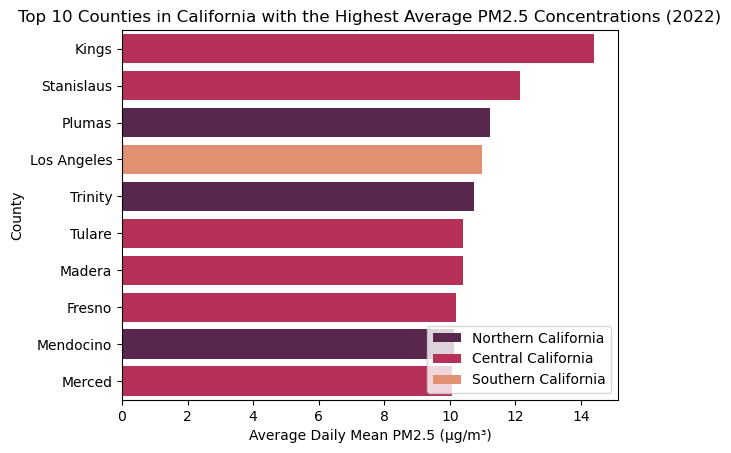

In [62]:
# Set the hue_order to get the colors in order of Northern --> Central --> Southern
sns.barplot(x = 'daily_mean_PM2.5', y = 'County', hue = 'Region', data = pollutant_grouped, palette=palette_dct, \
            hue_order=['Northern California', 'Central California', 'Southern California'])
plt.xlabel('Average Daily Mean PM2.5 (µg/m³)')
plt.title('Top 10 Counties in California with the Highest Average PM2.5 Concentrations (2022)')
plt.legend(loc = 'lower right')

**EDA** <br>
After grouping by county, it is evident the top 10 counties in California with the highest average daily mean concentrations of PM 2.5 are Kings, Stanlislaus, Plumas, Los Angeles, Trinity, Tulare, Madera, Fresno, Mendocino, and Merced Counties. To explore regional patterns, these counties by region: Northern, Central, or Southern California. 6/10 top counties were located in Central California, 3/10 top counties were located in Northern California, and only 1/10 was located in Southern California. This suggests that Central California experiences the poorest air quality compared to the other regions of California, which is presumably because of its distance from the coast preventing the influx of fresh air from the coast. Additionally, the counties with the highest concentrations of PM 2.5 range between 10 - 15 µg/m³. However [National Park Service](<https://www.nps.gov/subjects/air/humanhealth-pm.htm>) says that 'Good' PM 2.5 Health Advisory levels range from 0 - 9 µg/m³. 

In [63]:
in_range = pollutant_analysis[['daily_mean_PM2.5', 'County']].groupby('County').mean()
len(in_range[in_range['daily_mean_PM2.5'] <= 9]) / in_range.shape[0]

0.66

Two-thirds of the counties in California have an average PM 2.5 concentration that is 'good'; the other one-third is considered 'moderate'. The National Park Service recommends unusually sensitive people to reduce exposure outside in areas with average PM 2.5 > 9 µg/m³, but in our bar chart, every single one of the top 10 counties have an average PM 2.5 above 9 µg/m³.

In [64]:
max_mean = pollutant_analysis[['daily_mean_PM2.5', 'County']].groupby('County').mean().sort_values(by='daily_mean_PM2.5', ascending=False).iloc[0]
max_mean

daily_mean_PM2.5    14.402358
Name: Kings, dtype: float64

In [65]:
max_mean / 9

daily_mean_PM2.5    1.600262
Name: Kings, dtype: float64

The county in California with the highest average daily mean PM 2.5 concentration level is 60% higher than the threshold for a county to have 'good' air quality. From our bar chart, we can see this county was Kings County, which was also located in Central California.

## Monthly Comparison of Mean and Median PM2.5 Concentrations by County
Let’s take a closer look at the variation of PM2.5 levels in California counties across the year of 2022.

In [66]:
# switch to datetime object
pollutant_time = pollutant_cleaned.copy()
pollutant_time['Date'] = pd.to_datetime(pollutant_time['Date'])
pollutant_time['Month'] = pollutant_time['Date'].dt.month_name()

In [67]:
# take monthly mean / median 
monthly_mean = pollutant_time.groupby(['County', 'Month'], as_index=False)['Daily Mean PM2.5 Concentration'].mean()
monthly_mean.rename(columns={'Daily Mean PM2.5 Concentration': 'Monthly Mean PM2.5 Concentration'}, inplace=True)
monthly_median = pollutant_time.groupby(['County', 'Month'], as_index=False)['Daily Mean PM2.5 Concentration'].median()
monthly_median.rename(columns={'Daily Mean PM2.5 Concentration': 'Monthly Median PM2.5 Concentration'}, inplace=True)

# order in month
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
monthly_mean['Month'] = pd.Categorical(monthly_mean['Month'], categories=month_order, ordered=True)
monthly_median['Month'] = pd.Categorical(monthly_median['Month'], categories=month_order, ordered=True)
monthly_mean.sort_values(['County', 'Month'], inplace=True)
monthly_median.sort_values(['County', 'Month'], inplace=True)
monthly_mean.reset_index(drop=True)
monthly_median.reset_index(drop=True)

County      Month  Monthly Median PM2.5 Concentration
0    Alameda    January                                12.0
1    Alameda   February                                 9.2
2    Alameda      March                                 6.1
3    Alameda      April                                 6.7
4    Alameda        May                                 6.4
..       ...        ...                                 ...
595     Yolo     August                                 5.3
596     Yolo  September                                 4.6
597     Yolo    October                                 9.7
598     Yolo   November                                 3.7
599     Yolo   December                                 5.9

[600 rows x 3 columns]

In [68]:
# pip install ipywidgets

In [69]:
from ipywidgets import Dropdown, interact
from matplotlib.colors import Normalize
from matplotlib import cm

def plot_per_county(county, metric):
    # get corresponding data
    if metric == 'Mean':
        data = monthly_mean
    if metric == 'Median':
        data = monthly_median
        
    county_data = data[data['County'] == county]
    
    # set color schemes
    vmin = county_data[f'Monthly {metric} PM2.5 Concentration'].min() * 0.9 - 2
    vmax = county_data[f'Monthly {metric} PM2.5 Concentration'].max() * 1.1 
    norm = Normalize(vmin=vmin, vmax=vmax)
    colors = cm.Reds(norm(county_data[f'Monthly {metric} PM2.5 Concentration']))
    
    plt.figure(figsize=(12, 6))
    
    # create bar plot
    bars = plt.bar(county_data['Month'], 
                   county_data[f'Monthly {metric} PM2.5 Concentration'], 
                   color=colors)
    
    # label bars
    for bar, value in zip(bars, county_data[f'Monthly {metric} PM2.5 Concentration']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1,
                 f"{value:.1f}", ha='center', va='bottom', color='white', fontsize=10)
    
    plt.title(f"Monthly {metric} PM2.5 Concentration in {county}", fontsize=14)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel(f"{metric} PM2.5 Concentration (µg/m³)", fontsize=12)
    plt.tight_layout()
    plt.show()

# dropdown bar
county_dropdown = Dropdown(
    options=pollutant_time['County'].unique(),
    description='County:',
    style={'description_width': 'initial'}
)

# implement
interact(plot_per_county, county=county_dropdown, metric='Mean')
interact(plot_per_county, county=county_dropdown, metric='Median')

interactive(children=(Dropdown(description='County:', options=('Alameda', 'Butte', 'Calaveras', 'Colusa', 'Con…

interactive(children=(Dropdown(description='County:', options=('Alameda', 'Butte', 'Calaveras', 'Colusa', 'Con…

<function __main__.plot_per_county(county, metric)>

In [71]:
import pandas as pd
import plotly.graph_objects as go

# Clean and prep data (re-run if needed)
pollutant_time = pollutant_cleaned.copy()
pollutant_time['Date'] = pd.to_datetime(pollutant_time['Date'])
pollutant_time['Month'] = pollutant_time['Date'].dt.month_name()

# Define month order
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

pollutant_time['Month'] = pd.Categorical(pollutant_time['Month'], categories=month_order, ordered=True)

# Compute monthly mean and median
monthly_mean = pollutant_time.groupby(['County', 'Month'], as_index=False)['Daily Mean PM2.5 Concentration'].mean()
monthly_mean.rename(columns={'Daily Mean PM2.5 Concentration': 'Monthly Mean PM2.5 Concentration'}, inplace=True)

monthly_median = pollutant_time.groupby(['County', 'Month'], as_index=False)['Daily Mean PM2.5 Concentration'].median()
monthly_median.rename(columns={'Daily Mean PM2.5 Concentration': 'Monthly Median PM2.5 Concentration'}, inplace=True)

# Combine into one dataframe
monthly_mean["Metric"] = "Mean"
monthly_mean.rename(columns={"Monthly Mean PM2.5 Concentration": "Value"}, inplace=True)

monthly_median["Metric"] = "Median"
monthly_median.rename(columns={"Monthly Median PM2.5 Concentration": "Value"}, inplace=True)

combined = pd.concat([monthly_mean, monthly_median], ignore_index=True)
combined.sort_values(by=['County', 'Metric', 'Month'], inplace=True)

# List of counties and metrics
counties = combined['County'].unique()
metrics = ['Mean', 'Median']

# Create initial figure with first county + mean
init_data = combined[(combined['County'] == counties[0]) & (combined['Metric'] == 'Mean')]

fig = go.Figure()

bar = go.Bar(
    x=init_data['Month'],
    y=init_data['Value'],
    marker=dict(color=init_data['Value'], colorscale='Reds'),
    text=init_data['Value'].round(1),
    textposition='auto'
)

fig.add_trace(bar)

# Update layout
fig.update_layout(
    title=f"Monthly Mean PM2.5 Concentration in {counties[0]}",
    xaxis_title="Month",
    yaxis_title="PM2.5 Concentration (µg/m³)",
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label=f"{county} - {metric}",
                    method="update",
                    args=[
                        {
                            "y": [combined[(combined['County'] == county) & (combined['Metric'] == metric)]['Value']],
                            "x": [combined[(combined['County'] == county) & (combined['Metric'] == metric)]['Month']],
                            "text": [combined[(combined['County'] == county) & (combined['Metric'] == metric)]['Value'].round(1)],
                            "marker": dict(
                                color=combined[(combined['County'] == county) & (combined['Metric'] == metric)]['Value'],
                                colorscale='Reds'
                            )
                        },
                        {
                            "title": f"Monthly {metric} PM2.5 Concentration in {county}"
                        }
                    ]
                )
                for county in counties for metric in metrics
            ],
            direction="down",
            showactive=True,
            x=0.5,
            xanchor="center",
            y=1.1,
            yanchor="top"
        )
    ],
    height=500,
    margin=dict(t=100)
)

fig.show()


/var/folders/3j/drj0214n2bqdbrn4vd1d19_m0000gn/T/ipykernel_63819/1141340674.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_mean = pollutant_time.groupby(['County', 'Month'], as_index=False)['Daily Mean PM2.5 Concentration'].mean()
/var/folders/3j/drj0214n2bqdbrn4vd1d19_m0000gn/T/ipykernel_63819/1141340674.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_median = pollutant_time.groupby(['County', 'Month'], as_index=False)['Daily Mean PM2.5 Concentration'].median()


In [73]:
fig.write_html('monthly_stats.html', include_plotlyjs='cdn')

Distribution of Monthly PM2.5 Concentration Variables:
 - Overall, both the mean and median PM2.5 concentrations are typically lower in the middle months (e.g., March, April, May, June) compared to the months at the edges of the year. This creates a bimodal distribution with peaks occurring at both ends of the month range.

Potential Outliers in PM2.5 Concentration:
 - El Dorado: The mean PM2.5 concentration in September is 15.4, while the median is 3.5, suggesting a potential outlier.
 - Mariposa: The mean PM2.5 concentrations for July (20.2), August (21.7), and September (32.6) are significantly higher than the medians for these months (12.1, 10.6, and 9, respectively), indicating potential outliers.
 - Nevada: The mean PM2.5 concentration in September is 30.4, whereas the median is 4.1, suggesting a potential outlier.
 - Placer: The mean PM2.5 concentration in September is 24.4, while the median is 6.0, pointing to a potential outlier.
 - Siskiyou: The mean PM2.5 concentration in July is 20.0, whereas the median is 3.6, suggesting a potential outlier.

## Interactive Map of PM2.5 Concentration in California (2022)

Now, we want to look a little more broadly at California’s regions (Northern, Central, and Southern) for differences in PM2.5 Air Pollution using a chloropleth map.

In [74]:
# Importing Plotly Packages
import plotly.express as px
import json
from urllib.request import urlopen
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [75]:
# Getting the GeoJson of USA Counties
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
county_lookup = {
    feature['properties']['NAME']: feature
    for feature in counties['features']
    if feature['properties']['STATE'] == '06'
}

# Narrowing down to California Counties
california_counties = {
    "type": "FeatureCollection",
    "features": [
        feature for feature in counties['features']
        if feature['properties']['STATE'] == '06'
    ]
}

# Verify count of counties for California
count = 0
for feature in california_counties['features']:  
    count += 1
print(count)

58


In [76]:
# Convert values to match the GeoJson format
def convert_to_fip(site_id):
    return '0' + str(site_id)[:4]
fip_pollutant = pollutant_cleaned.assign(fips = pollutant_cleaned.get('Site ID').apply(convert_to_fip))

# Convert to Date-Time Format for slider function in map
fip_pollutant['Date'] = pd.to_datetime(fip_pollutant['Date'], format='%m/%d/%Y')
fip_pollutant['Year-Month'] = fip_pollutant['Date'].dt.to_period('M')
monthly_avg = fip_pollutant.rename(columns = {"Daily Mean PM2.5 Concentration": "Monthly Mean PM2.5"})
monthly_avg = (monthly_avg.get(['Monthly Mean PM2.5', 'Year-Month', 'County', 'fips'])
               .groupby(['Year-Month', 'County', 'fips']).mean().reset_index())
monthly_avg['Year-Month'] = monthly_avg['Year-Month'].astype(str)
monthly_avg['fips'] = monthly_avg['fips'].astype(str)
monthly_avg

Year-Month        County   fips  Monthly Mean PM2.5
0      2022-01       Alameda  06001           12.032258
1      2022-01         Butte  06007            9.894318
2      2022-01     Calaveras  06009           12.882609
3      2022-01        Colusa  06011           11.381481
4      2022-01  Contra Costa  06013           11.001429
..         ...           ...    ...                 ...
595    2022-12        Tehama  06103            7.903226
596    2022-12       Trinity  06105           11.750000
597    2022-12        Tulare  06107           10.000000
598    2022-12       Ventura  06111            4.234409
599    2022-12          Yolo  06113            9.939394

[600 rows x 4 columns]

In [77]:
# Slider Map
fig = px.choropleth(
    data_frame=monthly_avg,
    geojson=california_counties,
    locations='fips',
    color='Monthly Mean PM2.5',
    hover_name='County',                   # Show county name on hover
    animation_frame='Year-Month',          # Slider for each month
    color_continuous_scale="YlOrRd",
    featureidkey='id',     
    scope='usa',                           
    title="Monthly Average PM2.5 Concentration in California Counties (2022)"
)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    coloraxis_colorbar=dict(title="PM2.5 (µg/m³)"),
    sliders=[{
        "currentvalue": {"prefix": "Month: "}
    }]
)

# Show the map
fig

In [78]:
fig.write_html('timeline_chloropleth.html', include_plotlyjs='cdn')

From this map, we can see a higher concentration in Central California during the winter and a shift to Southern California in the spring time.

### Map of Asthma Prevalence in California (2022)
To compare, we will map out the prevalence of asthma from our PLACES data from 2022 to see where there is overlap between PM2.5 levels and asthma.

In [79]:
fig2 = px.choropleth(
    data_frame=ca_places,
    geojson=california_counties,
    locations='locationname',
    color='crude_data_value',            
    hover_name='locationname', # Show county name on hover
    color_continuous_scale="purples",       
    featureidkey='properties.NAME',
    scope='usa',                           
    title="Asthma Prevalence in California Counties (2022)"
)
fig2.update_geos(fitbounds="locations", visible=False)

# Show the map
fig2

In [80]:
fig2.write_html('asthma_chloropleth.html', include_plotlyjs='cdn')

Based off the crude data percentage from our health data, we see the highest relative levels of Asthma prevalence being in Central and Northern California.

### Comparison Map of PM2.5 and Asthma Levels in California (2022)

Finally, we will put the chloropleth maps side by side for a direct visual comparison between Asthma prevalence and PM2.5 Pollution.

In [81]:
fig3 = go.Figure()

pollutant_avg = fip_pollutant.rename(columns = {"Daily Mean PM2.5 Concentration": "Average PM2.5 (2022)"})
pollutant_avg = (pollutant_avg.get(['Average PM2.5 (2022)', 'County', 'fips'])
               .groupby(['County', 'fips']).mean().reset_index())

# Merge the asthma data (ca_places) with the monthly PM2.5 data (monthly_avg)
combined = pd.merge(pollutant_avg, ca_places, left_on='County', right_on='locationname', how='left')

fig3 = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Asthma Rates", "PM2.5 Levels"),
    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]]  # Set both subplots to choropleth
)

# Add the Asthma choropleth trace
fig3.add_trace(go.Choropleth(
    geojson=california_counties,  # GeoJSON for California counties
    locations=combined['fips'],  # Use fips for county IDs
    z=combined['crude_data_value'],  # Asthma prevalence data
    hoverinfo="text",  # Show location name and asthma rate on hover
    hovertext=combined['County'] + '<br>' + 'Asthma Rate: ' + (combined['crude_data_value']).astype(str) + '%',
    showscale=False,
    colorscale="Purples",
    name="Asthma Rates",
), row=1, col=1)

# Add PM2.5 choropleth trace
fig3.add_trace(go.Choropleth(
    geojson=california_counties,
    locations=combined['fips'],
    z=combined['Average PM2.5 (2022)'],  # PM2.5 concentration data
    hoverinfo="text",
    hovertext=combined['County'] + '<br>' + 'PM2.5: ' + combined['Average PM2.5 (2022)'].round(2).astype(str) + ' µg/m³',
    showscale=False,
    colorscale="YlOrRd",
    name="PM2.5 Levels",
), row=1, col=2)

# Define layout with color axis and geo settings
fig3.update_geos(fitbounds="locations", visible=False)

fig3.update_layout(
    title="Asthma Rates and PM2.5 Pollution in California Counties",
    geo=dict(projection_type="albers usa"),
    showlegend=True,
    geo2=dict(
        projection_type="albers usa"),
)

# Show the map
fig3

In [82]:
fig3.write_html('comparison_chloropleth.html', include_plotlyjs='cdn')

When comparing the asthma and PM2.5 maps side by side, we observe a notable overlap of high asthma prevalence and elevated PM2.5 levels in Central California. However, the relationship is less consistent in other regions. Northern California exhibits higher asthma rates despite having relatively lower annual average PM2.5 levels. Conversely, Southern California shows semi-high yearly PM2.5 averages but relatively lower asthma prevalence.

It is important to note that the PM2.5 data used in this map reflects yearly averages, which may obscure seasonal fluctuations. For instance, the monthly PM2.5 map highlights a pronounced increase in PM2.5 levels in Southern California during the spring months. This seasonal variation contributes to the region's higher yearly averages but may not fully explain the lower asthma prevalence. These findings underscore the complexity of the relationship between air pollution and asthma and suggest that additional factors, such as urbanization and healthcare access, may play a significant role.

## Interactive Map of AQI (Air Quality Index) Levels in California (2022)

By conducting the same data cleaning from PM2.5, we can apply our analysis to understanding AQI levels throughout California counties.

In [84]:
# Ensure FIPS codes match GeoJSON
def convert_to_fip(site_id):
    return '0' + str(site_id)[:4]

fip_pollutant = pollutant_cleaned.rename(columns={"Daily AQI Value": "Average AQI (2022)"})
fip_pollutant['fips'] = fip_pollutant['Site ID'].apply(convert_to_fip)

fip_pollutant

Date   Site ID  POC  Daily Mean PM2.5 Concentration  \
0      01/01/2022  60010007    3                            12.7   
1      01/02/2022  60010007    3                            13.9   
2      01/03/2022  60010007    3                             7.1   
3      01/04/2022  60010007    3                             3.7   
4      01/05/2022  60010007    3                             4.2   
...           ...       ...  ...                             ...   
59751  12/07/2022  61131003    1                             3.8   
59752  12/13/2022  61131003    1                             6.0   
59753  12/19/2022  61131003    1                            34.8   
59754  12/25/2022  61131003    1                            23.2   
59755  12/31/2022  61131003    1                             1.0   

       Average AQI (2022)       Local Site Name  Daily Obs Count  \
0                      58             Livermore                1   
1                      60             Livermore                1   
2                      39             Livermore                1   
3                      21             Livermore                1   
4                      23             Livermore                1   
...                   ...                   ...              ...   
59751                  21  Woodland-Gibson Road                1   
59752                  33  Woodland-Gibson Road                1   
59753                  99  Woodland-Gibson Road                1   
59754                  77  Woodland-Gibson Road                1   
59755                   6  Woodland-Gibson Road                1   

       State FIPS Code   County  Site Latitude  Site Longitude   fips  
0                    6  Alameda      37.687526     -121.784217  06001  
1                    6  Alameda      37.687526     -121.784217  06001  
2                    6  Alameda      37.687526     -121.784217  06001  
3                    6  Alameda      37.687526     -121.784217  06001  
4                    6  Alameda      37.687526     -121.784217  06001  
...                ...      ...            ...             ...    ...  
59751                6     Yolo      38.661210     -121.732690  06113  
59752                6     Yolo      38.661210     -121.732690  06113  
59753                6     Yolo      38.661210     -121.732690  06113  
59754                6     Yolo      38.661210     -121.732690  06113  
59755                6     Yolo      38.661210     -121.732690  06113  

[59756 rows x 12 columns]

Then find the average across those newly categorized locations.

In [85]:
# Calculate county-level AQI averages
aqi_avg = (
    fip_pollutant[['Average AQI (2022)', 'County', 'fips']]
    .groupby(['County', 'fips'])
    .mean()
    .reset_index()
)

aqi_avg.sort_values(by="Average AQI (2022)",ascending=False).head(10)

County   fips  Average AQI (2022)
13        Kings  06031           56.242718
43   Stanislaus  06099           51.649664
15  Los Angeles  06037           50.389546
19    Mendocino  06045           47.363766
47       Tulare  06107           46.445626
16       Madera  06039           46.077778
26       Plumas  06063           45.818996
24       Orange  06059           45.303409
44       Sutter  06101           45.261236
10     Imperial  06025           44.936615

Notice the positional proportions accross counties remaining relatively the same. Thus we discovered confounding variables are at play proving our correlation but not being a for certain causation when doing the same analysis on air quality(which includes PM2.5). Given what we know that urban environments like in our background would more suspectible to these issues. This is shown below:

In [86]:
# Load GeoJSON and filter for California counties
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

california_counties = {
    "type": "FeatureCollection",
    "features": [
        feature for feature in counties['features']
        if feature['properties']['STATE'] == '06'  # California state code
    ]
}


# california_counties

By first creating the counties' boundaries with an API to properly match the Air Quality sites' effects

In [87]:
# Merge AQI and asthma data
combined = pd.merge(aqi_avg, ca_places, left_on='County', right_on='locationname', how='left')
# AQI choropleth map
fig_aqi = go.Figure(go.Choropleth(
    geojson=california_counties,
    locations=aqi_avg['fips'],  # Use FIPS for county IDs
    z=aqi_avg['Average AQI (2022)'],  # AQI averages
    hoverinfo="text",
    hovertext=aqi_avg['County'] + '<br>' + 'AQI: ' + aqi_avg['Average AQI (2022)'].round(2).astype(str),
    showscale=True,
    colorscale="YlOrRd",
    colorbar=dict(
        title="AQI (2022)",
        thickness=15,
        len=0.7  # Adjust colorbar laength
    ),
    name="AQI Levels"
))

# Layout and settings
fig_aqi.update_geos(fitbounds="locations", visible=False)
fig_aqi.update_layout(
    title="AQI Levels in California Counties (2022)",
    geo=dict(projection_type="albers usa"),
    showlegend=True
)

# Show the map
fig_aqi.show()

In [88]:
fig_aqi.write_html('aqi_levels.html', include_plotlyjs='cdn')

Here we notice that asthma also corresponds to the air quality values in general (the metric includes other contaminants and PM(ozone)). Therefore going forward with analysis if we desire causation we'll need to seek a case where the air quality is desirable but where PM2.5 is concentrated.

## Investigating Asthma Prevalence: Asthma by Region (2022)

In [91]:
places = pd.read_csv("data/ca_places.csv")
places.head()

locationname  age_data_value  crude_data_value  age_low_confidence_limit  \
0      Alameda             8.9               8.9                       7.9   
1       Alpine            10.5              10.3                       9.3   
2       Amador            10.5              10.5                       9.2   
3        Butte            10.7              10.7                       9.4   
4    Calaveras            10.8              10.6                       9.5   

   crude_low_confidence_limit  age_high_confidence_limit  \
0                         7.9                       10.1   
1                         9.1                       11.9   
2                         9.2                       11.8   
3                         9.4                       12.1   
4                         9.4                       12.2   

   crude_high_confidence_limit  totalpopulation  totalpop18plus  
0                         10.0          1628997         1311253  
1                         11.7             1190             998  
2                         11.8            41412           35068  
3                         12.1           207303          165784  
4                         11.9            46563           38508

Recall our [Top 10 Counties](#plot-one) plot. We found that a majority of the counties with high concentrations of PM2.5 are located within Central California. Let's now take a deeper dive into the prevalence of *asthma* in adults based on region.

In [92]:
places['Region'] = places['locationname'].map(region_mapping)
places[places['Region'].isna()]

Empty DataFrame
Columns: [locationname, age_data_value, crude_data_value, age_low_confidence_limit, crude_low_confidence_limit, age_high_confidence_limit, crude_high_confidence_limit, totalpopulation, totalpop18plus, Region]
Index: []

With all our counties mapped to regions (no NaNs), we can now begin our investigation.

In [93]:
region_agg = (
    places.groupby("Region")
    .apply(lambda x: 
           (x["age_data_value"] * x["totalpop18plus"]).sum() / x["totalpop18plus"].sum()
          )
    .reset_index(name="region_asthma_value").sort_values(by="region_asthma_value", ascending=False)
)

region_agg

/var/folders/3j/drj0214n2bqdbrn4vd1d19_m0000gn/T/ipykernel_63819/3142152678.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Region  region_asthma_value
1  Northern California             9.949881
0   Central California             9.680337
2  Southern California             9.423115

When considering aggregate statistics for the counties in each region, it was important to consider a weighted mean. By calculating percentages based on the *total* # of people with asthma divided by *total* population of region rather than taking the mean of percentages, we take into consideration that populations vary among counties and regions.

Notice that Northern California has the highest percentage of asthmatic adults rather than Central California. Let's take a deeper dive into this:

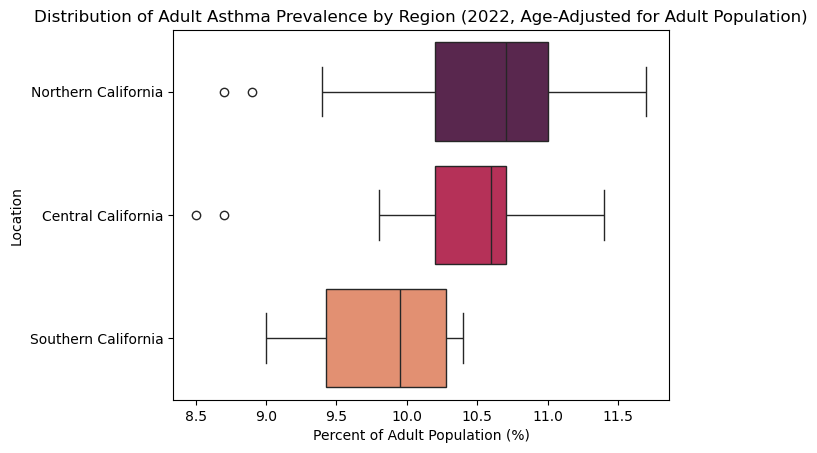

In [70]:
sns.boxplot(
    data=places,
    x="age_data_value",
    y="Region",
    hue="Region",
    palette=palette_dct,
    hue_order=region_order,
    order=places.groupby('Region')['age_data_value'].median().sort_values(ascending=False).index # sort by median
)

plt.title("Distribution of Adult Asthma Prevalence by Region (2022, Age-Adjusted for Adult Population)")
plt.ylabel("Location")
plt.xlabel("Percent of Adult Population (%)")
plt.show()

Looking at the distributions for each region:

* **Northern California**: The distribution appears to have more of a normal/symmetric distribution when excluding two outliers present in the lower range. Our whiskers are of around equal length, and our median is relatively centered amongst the interquartile range. Most counties fall within the range of 10.5–11%, meaning fewer counties have lower asthma prevalence.

* **Central California**: At first glance, we see that the median line is slightly off-center (closer to the right) indicating a left-skewed distribution, however, the right whisker is longer, and there are potential outliers on the lower end. All things considered, the distribution is a relatively normal/symmetric distribution.

* **Southern California**: The distribution is left-skewed as our left whisker is much longer and our median falls closer to the right of the interquartile range. This is the standard shape of a left-skewed distribution, with no outliers present.

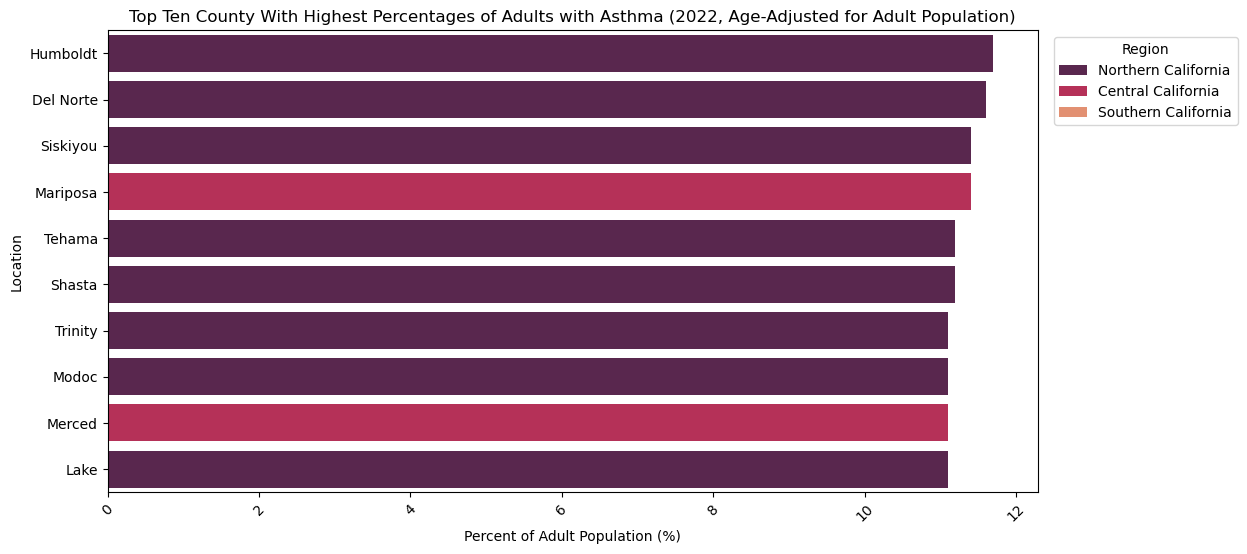

In [71]:
plt.figure(figsize=(12, 6))

sns.barplot(
    x="age_data_value", 
    y="locationname", 
    hue="Region",
    palette=palette_dct,
    hue_order=region_order,
    data=places.sort_values(by="age_data_value", ascending=False).iloc[:10] # grab the top ten
)

plt.xticks(rotation=45)
plt.title("Top Ten County With Highest Percentages of Adults with Asthma (2022, Age-Adjusted for Adult Population)")
plt.ylabel("Location")
plt.xlabel("Percent of Adult Population (%)")
plt.legend(title="Region", bbox_to_anchor=(1.01, 1))
plt.show()

Notice how Northern California counties dominate the charts when it comes to the highest percentage of asthmatic adults. Central California has some presence as well, while Southern California has no presence at all. Considering that Southern California was only *one* of our top 10 counties in terms of PM2.5 concentrations, this pattern aligns with our hypothesis; less presence of PM2.5 we assume would lead to less presence of asthma. To understand if there truly is a correlation, however, we'll need to do some more digging later in our analyses.

# Ethics & Privacy

Possible biases in the data may be due to the methodology of differing counties during census collection although the degree to which this would affect the findings is still unknown. Another is that the dataset primarily includes individuals living at or below 150% of the poverty level, which may lead to the exclusion of other socioeconomic groups. This could result in a lack of diversity in perspectives and experiences, potentially skewing the analysis.

The data collection is consensual participants are informed that their data will be anonymized and used for public domain purposes, ensuring transparency in the process. Self-reporting in surveys can introduce bias, as individuals may not accurately represent their circumstances or may feel pressured to respond in a socially desirable manner. Conduct a thorough review of the dataset to identify any demographic imbalances or gaps in representation after cleaning. Then implement statistical techniques to control for confounding variables and assess the impact of potential biases on the results. Present findings transparently, highlighting limitations due to bias and the demographic composition of the dataset. The study involves sensitive information related to individuals' financial situations, which raises concerns about privacy and the potential misuse of data. Ensuring the of use non-partial survey design and language to minimize bias in self-reporting.

A sparse data analysis approach given that we don’t have to come to a final decision on the dataset until next week but for this CDC dataset, we would likely apply Spearman’s rank correlation to cut through some of the self-reporting noise and apply more/different models after findings/insights in the data are discovered. After doing the prerequisite cleaning and finding whether or not there are any more disparities in the data such as overrepresented groups in one specific state perhaps.

# Discussion and Conclusion

This quarter, we aimed to explore whether prevalence and proximity to the PM2.5 pollutant correlate with the incidences of asthmatic adults in California. Collecting data from the CDC’s PLACES dataset for asthma prevalence and the EPA’s air quality data for PM2.5 pollution, we aggregated information at the county level to investigate spatial, regional, and temporal trends.


**Data Summary + Analysis Description**

We investigated whether the prevalence and proximity to PM 2.5 pollution correlates with the incidence of asthma in California. To analyze this, we used two datasets: one containing details about counties in California and the proportion of the population afflicted with asthma, which we called `ca_places`, and another tracking air quality and PM 2.5 pollution levels by site in California, referred to as `pollutant_analysis`. To begin, we grouped the data by county and calculated the mean statistics. We selected the top 10 counties with the highest average PM 2.5 concentrations and displayed this information in a bar chart. The chart revealed that most of these counties were in Central California, while 3 of the 10 counties were located in Northern California. We also created choropleths of AQI levels and asthma prevalence in 2022, which showed that counties in Central California had both higher AQI levels and higher rates of asthma. 
Next, we identified the counties with the highest percentages of adults with asthma. Interestingly, 8 of these top counties were in Northern California. To further explore the regional trends, we created a box-and-whisker plot of adult asthma prevalence by region. Northern and Central California both had approximately 10.5% of their adult population affected by asthma, while Southern California had a slightly lower prevalence of about 10%. This confirmed our earlier findings that asthma rates in Southern California were significantly lower than in Northern and Central California.
Our analysis suggests regions with high PM 2.5 pollution and asthma prevalence tend to be correlated with regions, particularly in Central and Northern California.


**Limitation**

This analysis has several limitations. First, the aggregation of EPA air quality data at the `county` level may oversimplify the understanding of pollution exposure, as air quality can vary significantly within counties, particularly between urban and rural areas. Urban centers often experience higher pollution levels due to factors such as traffic and industrial activity, which may not be fully captured by `county`-level data. Additionally, both the `PLACES` and `EPA` datasets are based on snapshots from 2022, limiting the ability to assess temporal variations or long-term trends in air pollution and asthma prevalence. Seasonal fluctuations and shifts over multiple years, which could provide deeper insights into the relationship between pollution and health, are not accounted for. Moreover, this analysis solely focused on the relationship between air pollution and asthma without considering other confounding variables, such as socio-economic status, healthcare access, or smoking rates, which could influence asthma prevalence. As a result, observed associations may be confounded by these unmeasured factors. Future research could address these limitations by incorporating time-series analysis, using multi-year data, and including additional socio-economic and environmental variables to better understand how confounding factors may affect the relationship between air pollution and asthma.

**Impact on Society**

Our analysis highlights significant societal implications of the correlation between PM 2.5 pollution and asthma prevalence in California, in populations approximately at the poverty line. This underscores the disproportionate environmental and health burden on low-income communities, where individuals may already face limited access to healthcare and other resources necessary for managing chronic illnesses like asthma. While also presenting a dynamic highlighting the need for targeted policy interventions, such as stricter pollution controls in high-risk areas, investments in public health programs, and expanded access to affordable healthcare for underserved communities. By focusing on regions with a high proportion of low-income residents, this analysis sheds light on the intersection of environmental injustice and public health.




# Team Contributions

- Kate – Coordinated overall project workflow to ensure cohesion across analyses; developed interactive choropleth maps visualizing asthma prevalence and PM2.5 levels by county; edited the final project video presentation.

- Katelyn – Retrieved and cleaned PLACES dataset; led data cleaning and exploratory data analysis; created box-and-whisker and bar charts linking asthma prevalence to California regions.

- Heidi – Cleaned PM2.5 pollutant data; managed project timeline and deliverables; produced bar charts highlighting the top 10 counties with the highest PM2.5 levels.

- Kyla – Conducted literature research on asthma-pollution relationships; summarized PM2.5 pollutant data insights; created interactive visualizations of PM2.5 levels by county.

- Felix – Investigated ethical and privacy considerations; summarized key insights from PLACES asthma data; designed choropleth maps visualizing Air Quality Index (AQI) across California.